# Lab 1 -- decision trees
## Assignment 0: Which problem is most difficult for a decision tree algorithm to learn
The minimized probability which makes the result to be ture

## Assignment 1: Calculate the entropy of the training datasets

In [20]:
import monkdata as m
import dtree as dt
import drawtree_qt5 as drawT
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment1: calculate the entropy of training dataset
e1 = dt.entropy(m.monk1)
e2 = dt.entropy(m.monk2)
e3 = dt.entropy(m.monk3)
print(e1) # 1.0
print(e2) # 0.957117428264771
print(e3) # 0.9998061328047111

1.0
0.957117428264771
0.9998061328047111


## Assignment2: Explain entropy for a uniform distribution and a non-uniform distribution
Uniform distribution like rolling a die, every possible result has same probability $p$, assume this distribution has $n$ kinds of results, its entropy is $n(-\frac{1}{n})log_2p$

For non-uniform distribution, its results have different probability. Assume there are $n$ results, $m$ of $n$ results have probability $p_1$, the rest $n-m$ have probability $p_2$, the entropy is $-m(\frac{1}{m})log_2p_1 - (n-m)(\frac{1}{n-m})log_2p_2$

## Assignment3: Calculate information gain

In [21]:
# Assignment3: Information Gain
# for monk1
monk1InfoGain = [dt.averageGain(m.monk1, m.attributes[i]) for i in range(0, 6)]
print(monk1InfoGain)
# for monk2
monk2InfoGain = [dt.averageGain(m.monk2, m.attributes[i]) for i in range(0, 6)]
print(monk2InfoGain)
# for monk3
monk3InfoGain = [dt.averageGain(m.monk3, m.attributes[i]) for i in range(0, 6)]
print(monk3InfoGain)

[0.07527255560831925, 0.005838429962909286, 0.00470756661729721, 0.02631169650768228, 0.28703074971578435, 0.0007578557158638421]
[0.0037561773775118823, 0.0024584986660830532, 0.0010561477158920196, 0.015664247292643818, 0.01727717693791797, 0.006247622236881467]
[0.007120868396071844, 0.29373617350838865, 0.0008311140445336207, 0.002891817288654397, 0.25591172461972755, 0.007077026074097326]


As we can see from above results, for monk1,  use a5; for monk2, use a5; for monk3, use a2.

## Assignment4: Expalin information gain
How does the entropy ofthe subsets, $S_k$, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting?

Pick the attribute which has largest information gain, because it can maximize the reduction of uncertainty, namely it is more important than other attributes in making decision. 

## Assignment5: Building decision trees

In [22]:
t1 = dt.buildTree(m.monk1, m.attributes)
print(1 - dt.check(t1, m.monk1test)) # 0.8287037037037037
print(1 - dt.check(t1, m.monk1)) # 1.0
#drawT.drawTree(t1)

t2 = dt.buildTree(m.monk2, m.attributes)
print(1 - dt.check(t2, m.monk2test)) #0.6921296296296297
print(1 - dt.check(t2, m.monk2)) # 1.0
#drawT.drawTree(t2)

t3 = dt.buildTree(m.monk3, m.attributes)
print(1 - dt.check(t3, m.monk3test)) # 0.9444444444444444
print(1 - dt.check(t3, m.monk3)) # 1.0
#drawT.drawTree(t3)

0.17129629629629628
0.0
0.30787037037037035
0.0
0.05555555555555558
0.0


## Assignment6: Explain pruning from a bias variance trade-off perspective.
The higher depth of a decision tree, the more complex the model is. Complex models are always companied with low bias, namely on training set, complex model can fit the data better. But high complex model can lead to high variance, also overfitting. Pruning is to lower the complex of our decision tree, so that the bias is improved but the variance is lowered, and the model is more flexible and general, also using pruning can avoid overfitting to some extent.

## Assignment7

for monk1

20 times


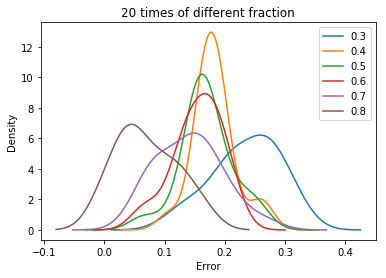

0.3    0.235057
0.4    0.182667
0.5    0.169355
0.6    0.155000
0.7    0.140789
0.8    0.070000
dtype: float64

100 times


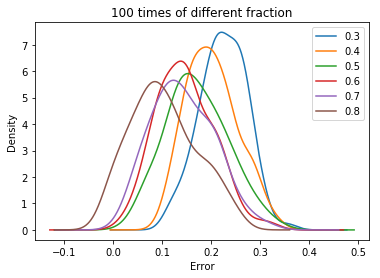

0.3    0.224023
0.4    0.201467
0.5    0.170323
0.6    0.146200
0.7    0.141842
0.8    0.102400
dtype: float64

500 times


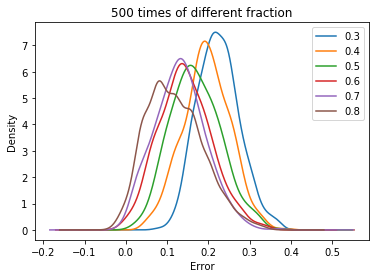

0.3    0.223977
0.4    0.195333
0.5    0.169387
0.6    0.144040
0.7    0.131684
0.8    0.119280
dtype: float64

1000 times


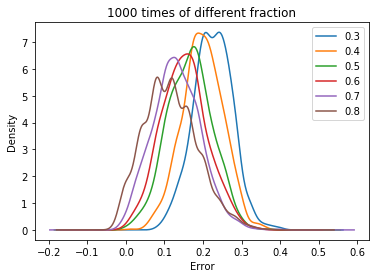

0.3    0.225253
0.4    0.198587
0.5    0.165742
0.6    0.151200
0.7    0.131684
0.8    0.116480
dtype: float64

 for monk3

20 times


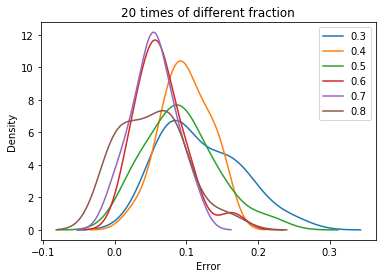

0.3    0.119186
0.4    0.098649
0.5    0.091803
0.6    0.064286
0.7    0.054054
0.8    0.052000
dtype: float64

100 times


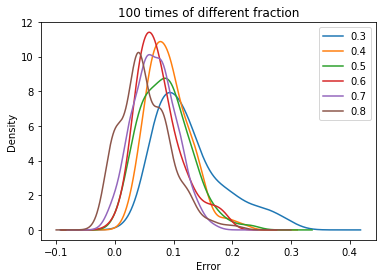

0.3    0.126279
0.4    0.091757
0.5    0.085902
0.6    0.075306
0.7    0.067568
0.8    0.052800
dtype: float64

500 times


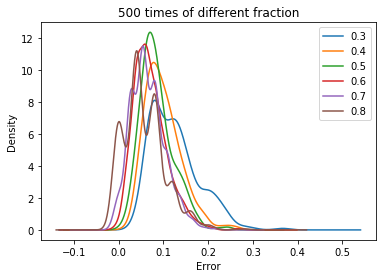

0.3    0.124395
0.4    0.098838
0.5    0.084590
0.6    0.070816
0.7    0.065135
0.8    0.056560
dtype: float64

1000 times


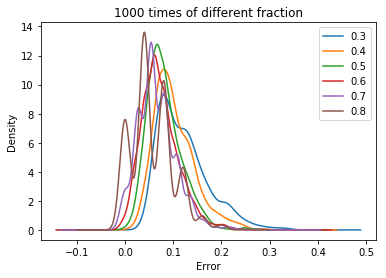

0.3    0.120640
0.4    0.101878
0.5    0.081443
0.6    0.072939
0.7    0.065784
0.8    0.056720
dtype: float64


In [26]:
fraction_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
times = [20, 100, 500, 1000]

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def prune(ot, val, rate):# find the tree which has lowest error rate recursively   
    monkVal = val
    tree = ot
    tPruned = dt.allPruned(tree)
    ratiodict = {} # a dict with right rate as key, the number of Pruned tree as value
    for i in range(0, len(tPruned)):# a loop to choose trees which has better right rate than original tree
        if dt.check(tPruned[i], monkVal) > rate:
            ratiodict[dt.check(tPruned[i],monkVal)]=i
    if len(ratiodict) > 0:
        r = max(ratiodict)
        return prune(tPruned[ratiodict[r]], monkVal, r)
    else:# stop when right rate of tree in this round cannot overpass trees in last round
        return (1-rate)#return the lowest error rate


def chooseFrac(fraction_list, times, dataset):# a function to choose best fraction size with many times
    for t in times:
        print("\n" + str(t) + " times")
        result=pd.DataFrame(index=range(0,t),columns=fraction_list)
        for frac in fraction_list:
            for i in range(0,t):
                monkTrain,monkVal=partition(dataset,frac)# split train set and validation set randomly
                ot=dt.buildTree(monkTrain, m.attributes)
                rate=dt.check(ot,monkVal)
                error_rate=prune(ot,monkVal,rate)
                result.set_value(i, frac, error_rate)
        result.plot.kde(title=str(t) + ' times of different fraction',legend=True)
        plt.ylabel('Density')
        plt.xlabel('Error')
        plt.show()
        #result.plot(title=str(t)+" times", kind='kde').show()# plot measure of spread
        print(result.apply(np.mean))# print mean value of each fraction size

        
print("for monk1")
chooseFrac(fraction_list, times, m.monk1)
print("\n for monk3")
chooseFrac(fraction_list, times, m.monk3)
